In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 결측치 시각화
import missingno as msno

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
oz = pd.read_csv('ozone.csv')
oz

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [4]:
oz.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

<AxesSubplot:>

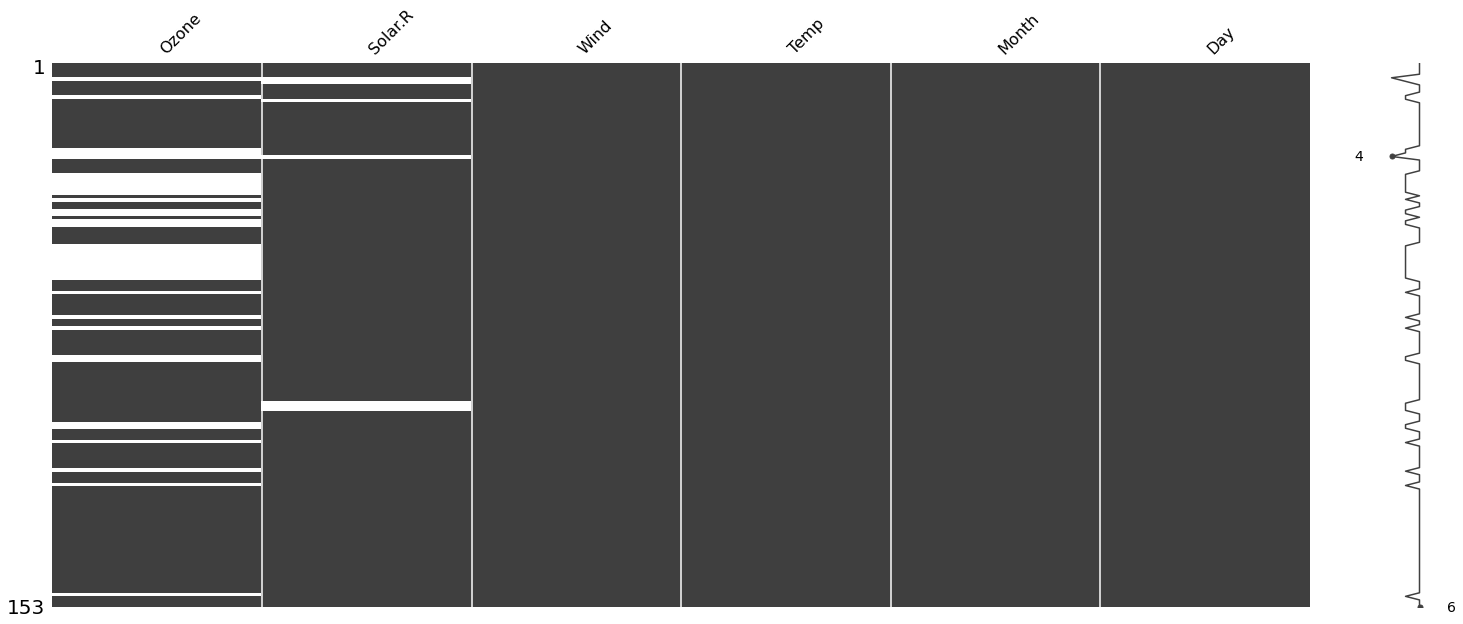

In [5]:
msno.matrix(oz)

In [6]:
oz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 7.3+ KB


In [7]:
# 와인 결측치 제거 버전
ozd = oz.dropna()
ozd.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

<AxesSubplot:>

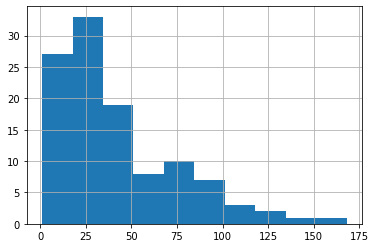

In [8]:
ozd.Ozone.hist()

<AxesSubplot:>

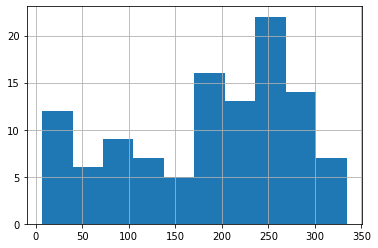

In [9]:
ozd["Solar.R"].hist()

<AxesSubplot:>

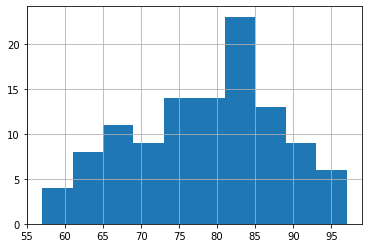

In [10]:
ozd.Temp.hist()

<AxesSubplot:>

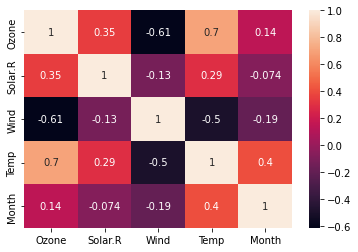

In [11]:
# 상관분석
ozd_corr = ozd.corr()
sns.heatmap(ozd_corr, annot = True)

In [12]:
X = ozd[["Solar.R", "Wind", "Temp"]]
Y = ozd[["Ozone"]]

In [13]:
# train / test 셋 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(88, 3) (88, 1)
(23, 3) (23, 1)


In [14]:
# train / validation 셋 나누기
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size = 0.25)
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(83, 3) (83, 1)
(28, 3) (28, 1)


In [15]:
# 표준화
X_train_st = (X_train - X_train.mean()) / X_train.std()
Y_train_st = (Y_train - Y_train.mean()) / Y_train.std()

X_val_st = (X_val - X_train.mean()) / X_train.std()
Y_val_st = (Y_val - Y_train.mean()) / Y_train.std()

X_test_st = (X_test - X_train.mean()) / X_train.std()
Y_test_st = (Y_test - Y_train.mean()) / Y_train.std()

In [16]:
# 정규화
X_train_no = (X_train - X_train.min()) / (X_train.min() - X_train.max())
Y_train_no = (Y_train - Y_train.min()) / (Y_train.min() - Y_train.max())

X_val_no = (X_val - X_train.min()) / (X_train.min() - X_train.max())
Y_val_no = (Y_val - Y_train.min()) / (Y_train.min() - Y_train.max())

X_test_no = (X_test - X_train.min()) / (X_train.min() - X_train.max())
Y_test_no = (Y_test - Y_train.min()) / (Y_train.min() - Y_train.max())

In [17]:
# 표준화 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train_st.columns
vif['VIF factor'] = [variance_inflation_factor(X_train_st.values, i) for i in range(X_train_st.shape[1])]
vif.round(1)

,features,VIF factor
0,Solar.R,1.2
1,Wind,1.3
2,Temp,1.5


In [18]:
# 정규화 다중공선선 확인
vif = pd.DataFrame()
vif['features'] = X_train_no.columns
vif['VIF factor'] = [variance_inflation_factor(X_train_no.values, i) for i in range(X_train_no.shape[1])]
vif.round(1)

,features,VIF factor
0,Solar.R,5.0
1,Wind,2.5
2,Temp,4.6


In [19]:
# 표준화 모델 학습
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_st, Y_train_st)

LinearRegression()

In [23]:
# 표준화 모델 검증
lr.score(X_val_st,Y_val_st)

0.5769281471871405

In [20]:
# 표준화 표준오차
from sklearn.metrics import mean_squared_error
pre_y_st = lr.predict(X_val_st)
mse = mean_squared_error(Y_val_st, pre_y_st)
mse

0.4719433789440404

In [21]:
# 정규화 모델 학습
lr = LinearRegression()
lr.fit(X_train_no, Y_train_no)

LinearRegression()

In [24]:
# 정규화 모델 검증
lr.score(X_val_no,Y_val_no)

0.6816304422919524

In [22]:
# 정규화 표준오차
pre_y_no = lr.predict(X_val_no)
mse = mean_squared_error(Y_val_no, pre_y_no)
mse

0.016522735669597426